# 実践15
data-analysis-basic-kadaiリポジトリへpractice_15フォルダを作成し以下格納する。

## 実践15-1
以下のデータはWikipediaページビューデータです。１年先までの時系列予測と評価をおこなってください。


```
data = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
```

In [1]:
# ライブラリのインポート
import pandas as pd
import seaborn as sns

In [2]:
# データの準備
data = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
display(data)
display(data.info())

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      2905 non-null   object 
 1   y       2905 non-null   float64
dtypes: float64(1), object(1)
memory usage: 45.5+ KB


None

<Axes: xlabel='ds', ylabel='y'>

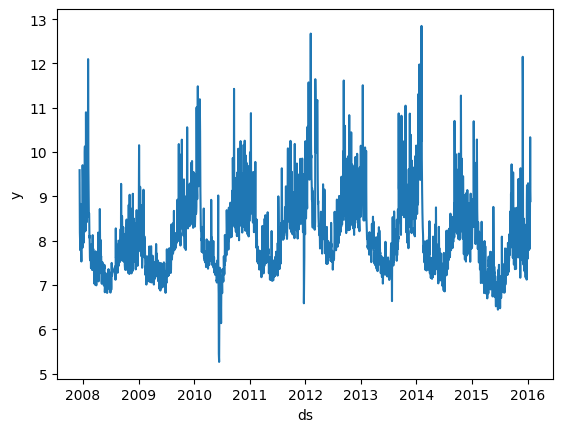

In [3]:
time = pd.to_datetime(data['ds'])
sns.lineplot(x=time, y=data['y'])

In [4]:
# 予測モデルの学習
from prophet import Prophet
model = Prophet()

In [5]:
model.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/0i07p71i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/njli74_f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15453', 'data', 'file=/tmp/tmpj05jfhvt/0i07p71i.json', 'init=/tmp/tmpj05jfhvt/njli74_f.json', 'output', 'file=/tmp/tmpj05jfhvt/prophet_modelk_cmr5r4/prophet_model-20240713121215.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:12:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:12:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [6]:
# 予測
future = model.make_future_dataframe(periods=365, freq='D')
future

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14
...,...
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18


In [7]:
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.041704,8.185407,9.456284,8.041704,8.041704,0.802946,0.802946,0.802946,0.352288,0.352288,0.352288,0.450658,0.450658,0.450658,0.0,0.0,0.0,8.844650
1,2007-12-11,8.040157,8.008289,9.217644,8.040157,8.040157,0.553024,0.553024,0.553024,0.119636,0.119636,0.119636,0.433389,0.433389,0.433389,0.0,0.0,0.0,8.593182
2,2007-12-12,8.038611,7.789088,9.005365,8.038611,8.038611,0.350386,0.350386,0.350386,-0.066669,-0.066669,-0.066669,0.417055,0.417055,0.417055,0.0,0.0,0.0,8.388997
3,2007-12-13,8.037064,7.733589,8.980163,8.037064,8.037064,0.329846,0.329846,0.329846,-0.072254,-0.072254,-0.072254,0.402100,0.402100,0.402100,0.0,0.0,0.0,8.366910
4,2007-12-14,8.035517,7.771986,9.005149,8.035517,8.035517,0.319356,0.319356,0.319356,-0.069575,-0.069575,-0.069575,0.388931,0.388931,0.388931,0.0,0.0,0.0,8.354874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,2017-01-15,7.192173,7.483370,8.906606,6.862196,7.516927,1.017923,1.017923,1.017923,0.048287,0.048287,0.048287,0.969637,0.969637,0.969637,0.0,0.0,0.0,8.210097
3266,2017-01-16,7.191152,7.865861,9.251588,6.859630,7.516937,1.343970,1.343970,1.343970,0.352288,0.352288,0.352288,0.991681,0.991681,0.991681,0.0,0.0,0.0,8.535122
3267,2017-01-17,7.190131,7.593428,9.064137,6.857064,7.516946,1.132419,1.132419,1.132419,0.119636,0.119636,0.119636,1.012783,1.012783,1.012783,0.0,0.0,0.0,8.322549
3268,2017-01-18,7.189109,7.374180,8.878984,6.854498,7.517429,0.966069,0.966069,0.966069,-0.066669,-0.066669,-0.066669,1.032738,1.032738,1.032738,0.0,0.0,0.0,8.155179


In [8]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2007-12-10,8.844650,8.185407,9.456284
1,2007-12-11,8.593182,8.008289,9.217644
2,2007-12-12,8.388997,7.789088,9.005365
3,2007-12-13,8.366910,7.733589,8.980163
4,2007-12-14,8.354874,7.771986,9.005149
...,...,...,...,...
3265,2017-01-15,8.210097,7.483370,8.906606
3266,2017-01-16,8.535122,7.865861,9.251588
3267,2017-01-17,8.322549,7.593428,9.064137
3268,2017-01-18,8.155179,7.374180,8.878984


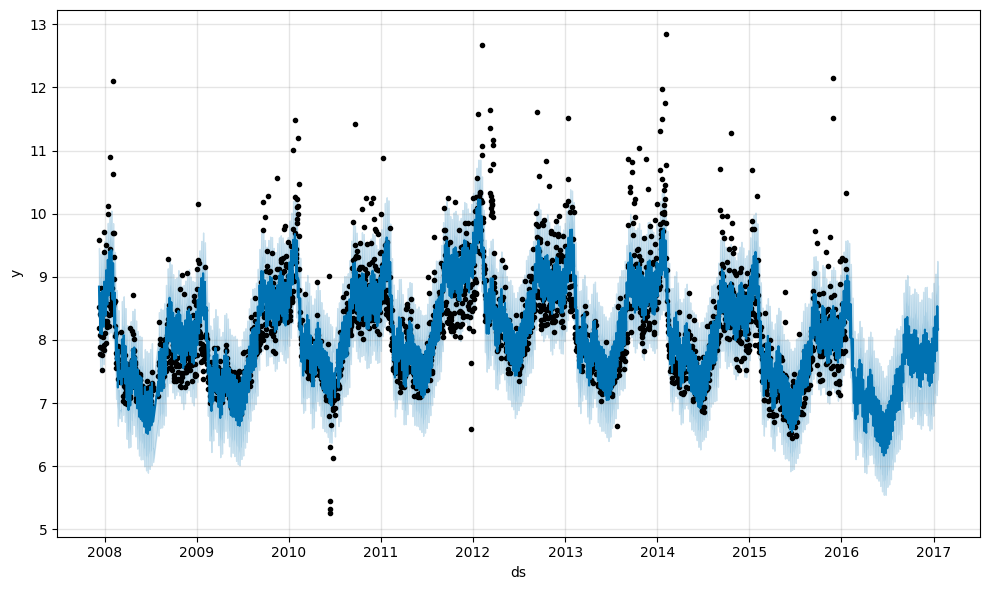

In [9]:
fig_forecast = model.plot(forecast)

In [10]:
cutoffs = pd.to_datetime(['2012-01-20', '2013-01-20', '2014-01-20', '2015-01-20'])

In [11]:
from prophet.diagnostics import cross_validation

In [12]:
df_cv = cross_validation(model, horizon = '365 days', cutoffs=cutoffs)

  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/ai1n2kyu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/9znyb62a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96160', 'data', 'file=/tmp/tmpj05jfhvt/ai1n2kyu.json', 'init=/tmp/tmpj05jfhvt/9znyb62a.json', 'output', 'file=/tmp/tmpj05jfhvt/prophet_modeltktjlhh4/prophet_model-20240713121222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:12:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:12:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/0oh1psno.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/hp1y_2yv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [13]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-01-21,9.037329,8.500191,9.570714,9.412056,2012-01-20
1,2012-01-22,9.402978,8.862124,9.937693,9.843578,2012-01-20
2,2012-01-23,9.655118,9.110641,10.180275,11.572175,2012-01-20
3,2012-01-24,9.472505,8.905714,10.032928,10.281718,2012-01-20
4,2012-01-25,9.291133,8.713542,9.818992,10.169767,2012-01-20
...,...,...,...,...,...,...
1449,2016-01-16,8.578334,7.812367,9.374746,7.817223,2015-01-20
1450,2016-01-17,8.973000,8.267160,9.715880,9.273878,2015-01-20
1451,2016-01-18,9.279093,8.587640,10.070250,10.333775,2015-01-20
1452,2016-01-19,9.062197,8.374861,9.836243,9.125871,2015-01-20


In [14]:
from prophet.diagnostics import performance_metrics

In [15]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,0.686503,0.828555,0.656449,0.072279,0.065984,0.072361,0.506897
1,38 days,0.676377,0.822421,0.642967,0.070917,0.065870,0.070979,0.513793
2,39 days,0.657083,0.810607,0.628415,0.069584,0.064837,0.069613,0.524138
3,40 days,0.635864,0.797411,0.614695,0.068426,0.064607,0.068423,0.534483
4,41 days,0.622575,0.789035,0.604798,0.067531,0.064607,0.067564,0.548276


In [16]:
df_p = performance_metrics(df_cv, monthly=True)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1,0.644833,0.803015,0.619168,0.068357,0.063227,0.068539,0.548276
1,2,1.068061,1.033471,0.718190,0.081407,0.064071,0.084334,0.588793
2,3,0.348479,0.590321,0.419802,0.052937,0.045684,0.052590,0.795217
3,4,0.154594,0.393185,0.296246,0.038668,0.029432,0.038491,0.914807
4,5,0.098357,0.313619,0.245851,0.033361,0.025915,0.033026,0.932314


<Axes: xlabel='horizon', ylabel='mse'>

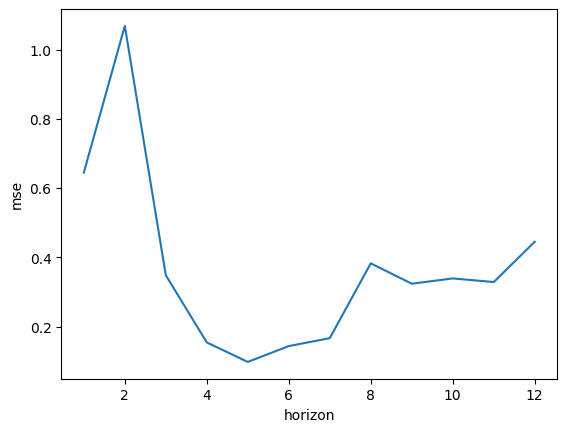

In [17]:
sns.lineplot(x='horizon', y='mse', data=df_p)

## 実践15-2
* https://terakoya.sejuku.net/programs/110/chapters/1381 ではdsとyだけのデータでした。実務では他にも多数の特徴量が存在しています。
* 複数の特徴量がある場合、prophetではどのように読み込めばよいでしょうか？調査して報告してください。

In [18]:
# モデルを学習する際に .add_regressor　で追加をする。
# https://vasteelab.com/2022/08/27/post-2207/
import pandas as pd
df = pd.DataFrame(pd.date_range(start='2019-09-01', end='2019-09-30', freq='D', name='ds'))
df['y'] = range(1, 31)
df['add1'] = range(101, 131)
df['add2'] = range(201, 231)
df.head()

,ds,y,add1,add2
0,2019-09-01,1,101,201
1,2019-09-02,2,102,202
2,2019-09-03,3,103,203
3,2019-09-04,4,104,204
4,2019-09-05,5,105,205


In [19]:
df_train = df.loc[df['ds']<'2019-09-21']
df_test = df.loc[df['ds']>='2019-09-21']

from prophet import Prophet
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.fit(df_train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/egf7mwbn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/e8kcncy7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35370', 'data', 'file=/tmp/tmpj05jfhvt/egf7mwbn.json', 'init=/tmp/tmpj05jfhvt/e8kcncy7.json', 'output', 'file=/tmp/tmpj05jfhvt/prophet_modelezq23auo/prophet_model-20240713121236.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:12:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:12:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:

In [20]:
forecast = model.predict(df_test)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-09-21,13.001655,20.990211,21.019095,12.986607,13.015491,-5.968591,-5.968591,-5.968591,13.981353,...,8.012762,8.012762,8.012762,-0.009158,-0.009158,-0.009158,0.0,0.0,0.0,21.005259
1,2019-09-22,13.241942,21.999679,22.090755,13.193666,13.284743,-6.537028,-6.537028,-6.537028,15.312910,...,8.775882,8.775882,8.775882,0.030130,0.030130,0.030130,0.0,0.0,0.0,22.047955
2,2019-09-23,13.482229,22.925828,23.105729,13.384208,13.564108,-7.105465,-7.105465,-7.105465,16.644468,...,9.539003,9.539003,9.539003,0.002618,0.002618,0.002618,0.0,0.0,0.0,23.023850
3,2019-09-24,13.722516,23.879548,24.153209,13.578214,13.851874,-7.673903,-7.673903,-7.673903,17.976025,...,10.302123,10.302123,10.302123,-0.000788,-0.000788,-0.000788,0.0,0.0,0.0,24.023851
4,2019-09-25,13.962803,24.821767,25.211251,13.760719,14.150202,-8.242340,-8.242340,-8.242340,19.307583,...,11.065243,11.065243,11.065243,-0.004195,-0.004195,-0.004195,0.0,0.0,0.0,25.023852
5,2019-09-26,14.203090,25.757362,26.270132,13.936600,14.449370,-8.810777,-8.810777,-8.810777,20.639140,...,11.828363,11.828363,11.828363,-0.007601,-0.007601,-0.007601,0.0,0.0,0.0,26.023852
6,2019-09-27,14.443377,26.683106,27.339907,14.102630,14.759431,-9.379214,-9.379214,-9.379214,21.970698,...,12.591483,12.591483,12.591483,-0.011007,-0.011007,-0.011007,0.0,0.0,0.0,27.023853
7,2019-09-28,14.683664,27.614096,28.422957,14.268650,15.077511,-9.947652,-9.947652,-9.947652,23.302255,...,13.354604,13.354604,13.354604,-0.009158,-0.009158,-0.009158,0.0,0.0,0.0,28.029110
8,2019-09-29,14.923951,28.582617,29.538051,14.434763,15.390197,-10.516089,-10.516089,-10.516089,24.633812,...,14.117724,14.117724,14.117724,0.030130,0.030130,0.030130,0.0,0.0,0.0,29.071805
9,2019-09-30,15.164238,29.478386,30.595460,14.594924,15.711997,-11.084526,-11.084526,-11.084526,25.965370,...,14.880844,14.880844,14.880844,0.002618,0.002618,0.002618,0.0,0.0,0.0,30.047700


## 実践15-3
* prophet以外にも著名なライブラリとしてstatsmodel, sktime, darts等があります。
* prophet含めそれぞれの利点・欠点を調査し報告してください。


In [21]:
"""
prophet
メリット:　モデルの学習を比較的簡単に行うことができる。欠損値が存在しても、正常に学習を行う。
デメリット: データ形式に指定がある。

statsmodel
メリット: ARIMA, SARIMAといった状況に応じた時系列モデルを使用することができる。統計的な検定も実行することができる。
デメリット:　学習時に欠損値があるとエラーが発生する。

sktime
メリット:　時系列データのクラスタリングや分類を行うことができる。

darts
メリット:　複数の予測モデルを組み合わせる機能がある。欠損値などの前処理が可能

"""

'\nprophet\nメリット:\u3000モデルの学習を比較的簡単に行うことができる。欠損値が存在しても、正常に学習を行う。\nデメリット: データ形式に指定がある。\n\nstatsmodel\nメリット: ARIMA, SARIMAといった状況に応じた時系列モデルを使用することができる。統計的な検定も実行することができる。\nデメリット:\u3000学習時に欠損値があるとエラーが発生する。\n\nsktime\nメリット:\u3000時系列データのクラスタリングや分類を行うことができる。\n\ndarts\nメリット:\u3000複数の予測モデルを組み合わせる機能がある。欠損値などの前処理が可能\n\n'

## 実践15-4: パラメータ調査（応用: 可能な範囲で検証してみてください）
* https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv の分析ではseasonality_mode='multiplicative'で効果がありました。それ以外に効果がありそうな設定を調査し試してください。
* 参考(以下を設定したから精度が上がるとは限りません)

1. 休日の効果を考慮:
    * add_country_holidays(country_name='US')を使用して、アメリカの休日を考慮に入れます。
2. weekly_seasonalityの設定 (現在は月次なのでどうすべきか)
3. n_changepointsの設定
    * データ内でトレンドが変化するポイントの候補数
    * デフォルト設定:

    デフォルトでは、Prophetはデータの最初の80%の期間内に、25個の変化点を均等に配置します。
    例えば、データが1000日分ある場合、最初の800日間に25個の変化点候補が配置されます。
    * 使用例:

    値を増やすことで、モデルはより多くの変化点を検討するため、トレンドの急激な変動を捉えやすくなります。
    値を減らすと、モデルはトレンドをよりスムーズにし、大きな変動を無視する傾向になります。
4. 外部リグレッサの追加: 外部の経済指標等を別カラムに入れる
5. その他あれば


In [22]:
"""
その他の指標
changepoint_prior_scale: 時系列データの変化点を検出する際の柔軟性　大きいほど、モデルが柔軟性を持つ
seasonality_prior_scale: 季節性の柔軟性を制御する　大きいほど、大きな季節性を捉える
holidays_prior_scale: 休日の効果に合わせて柔軟性を制御する
"""

'\nその他の指標\nchangepoint_prior_scale: 時系列データの変化点を検出する際の柔軟性\u3000大きいほど、モデルが柔軟性を持つ\nseasonality_prior_scale: 季節性の柔軟性を制御する\u3000大きいほど、大きな季節性を捉える\nholidays_prior_scale: 休日の効果に合わせて柔軟性を制御する\n'

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_air_passengers.csv')
time = pd.to_datetime(df['ds'])

from prophet import Prophet

def plot_train_result(model):
    future = model.make_future_dataframe(periods=36, freq='MS')
    forecast = model.predict(future)

    cutoffs = pd.to_datetime(['1954-12-01', '1955-12-01', '1956-12-01', '1957-12-01'])

    from prophet.diagnostics import cross_validation
    df_cv = cross_validation(model, horizon = '1096 days', cutoffs=cutoffs)

    from prophet.diagnostics import performance_metrics
    df_p = performance_metrics(df_cv, monthly=True)

    fig, axes = plt.subplots(3, 1, figsize=(20, 12))
    model.plot(forecast, ax=axes[0])
    sns.lineplot(x='horizon', y='mse', data=df_p, ax=axes[1]).set(ylim=(0, 7000))
    sns.lineplot(x='horizon', y='coverage', data=df_p, ax=axes[2]).set(ylim=(0, 0.7))

    display(df_p.describe())

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/81avosfv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/4f4k2pze.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52415', 'data', 'file=/tmp/tmpj05jfhvt/81avosfv.json', 'init=/tmp/tmpj05jfhvt/4f4k2pze.json', 'output', 'file=/tmp/tmpj05jfhvt/prophet_modeluwsma_bj/prophet_model-20240713121250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:12:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:12:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/7u_tpwev.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/ciflcke0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22044', 'data', 'file=/tmp/tmpj05jfhvt/7u_tpwev.json', 'init=/tmp/tmpj05jfhvt/ciflcke0.json', 'output', 'file=/tmp/tmpj05jfhvt/prophet_model8wg60l56/prophet_model-20240713121250.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:12:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:12:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/d1lk4wey.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/0_ecxccs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,33.00000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,20.00000,2001.691921,43.261433,36.682754,0.094913,0.089780,0.096303,0.266234
std,9.66954,1117.615643,11.584784,10.395634,0.017107,0.021164,0.020179,0.145097
min,4.00000,577.741878,24.036262,16.903350,0.051203,0.030947,0.049111,0.035714
25%,12.00000,1394.366651,37.341219,31.346638,0.086584,0.085783,0.087868,0.178571
50%,20.00000,1736.863314,41.675692,34.566547,0.097859,0.093085,0.094704,0.250000
75%,28.00000,2375.814081,48.742323,40.829214,0.105463,0.101148,0.105376,0.285714
max,36.00000,5067.788387,71.188401,61.001591,0.124827,0.123092,0.136943,0.714286


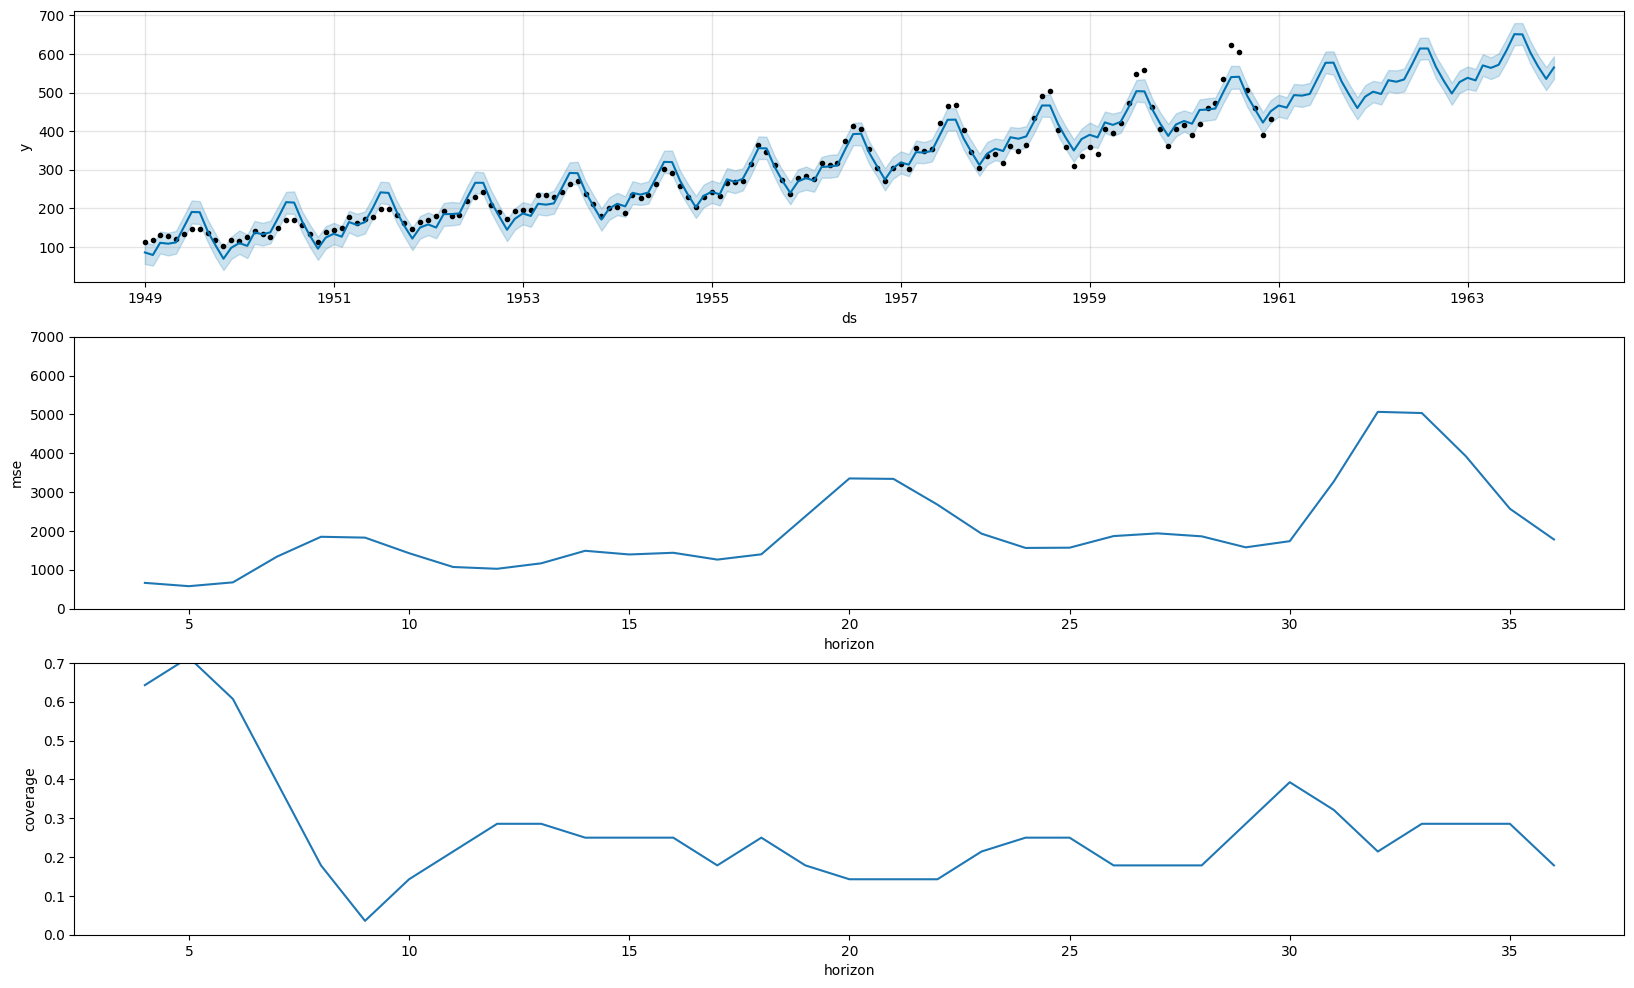

In [24]:
model = Prophet()
model.fit(df)
plot_train_result(model)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/yd0k8nzx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/gke7a1fx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31054', 'data', 'file=/tmp/tmpj05jfhvt/yd0k8nzx.json', 'init=/tmp/tmpj05jfhvt/gke7a1fx.json', 'output', 'file=/tmp/tmpj05jfhvt/prophet_modelk47_hf_y/prophet_model-20240713121254.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:12:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:12:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/68oqrlnc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/j6bebvfv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35908', 'data', 'file=/tmp/tmpj05jfhvt/68oqrlnc.json', 'init=/tmp/tmpj05jfhvt/j6bebvfv.json', 'output', 'file=/tmp/tmpj05jfhvt/prophet_model8xun7oon/prophet_model-20240713121254.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:12:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:12:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/3mzpvi20.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/_r4xv06k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,33.00000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,20.00000,2003.885405,43.295501,36.735297,0.095243,0.090522,0.096606,0.251082
std,9.66954,1109.552490,11.551115,10.333306,0.017354,0.021793,0.020180,0.151650
min,4.00000,571.468781,23.905413,16.631357,0.050339,0.029195,0.048229,0.035714
25%,12.00000,1387.230486,37.245543,31.385884,0.086006,0.085173,0.088081,0.178571
50%,20.00000,1760.495061,41.958254,35.268917,0.098917,0.094395,0.096581,0.214286
75%,28.00000,2345.181147,48.427070,40.441464,0.107623,0.104615,0.105432,0.285714
max,36.00000,5028.534537,70.912161,60.563170,0.124017,0.122650,0.136067,0.714286


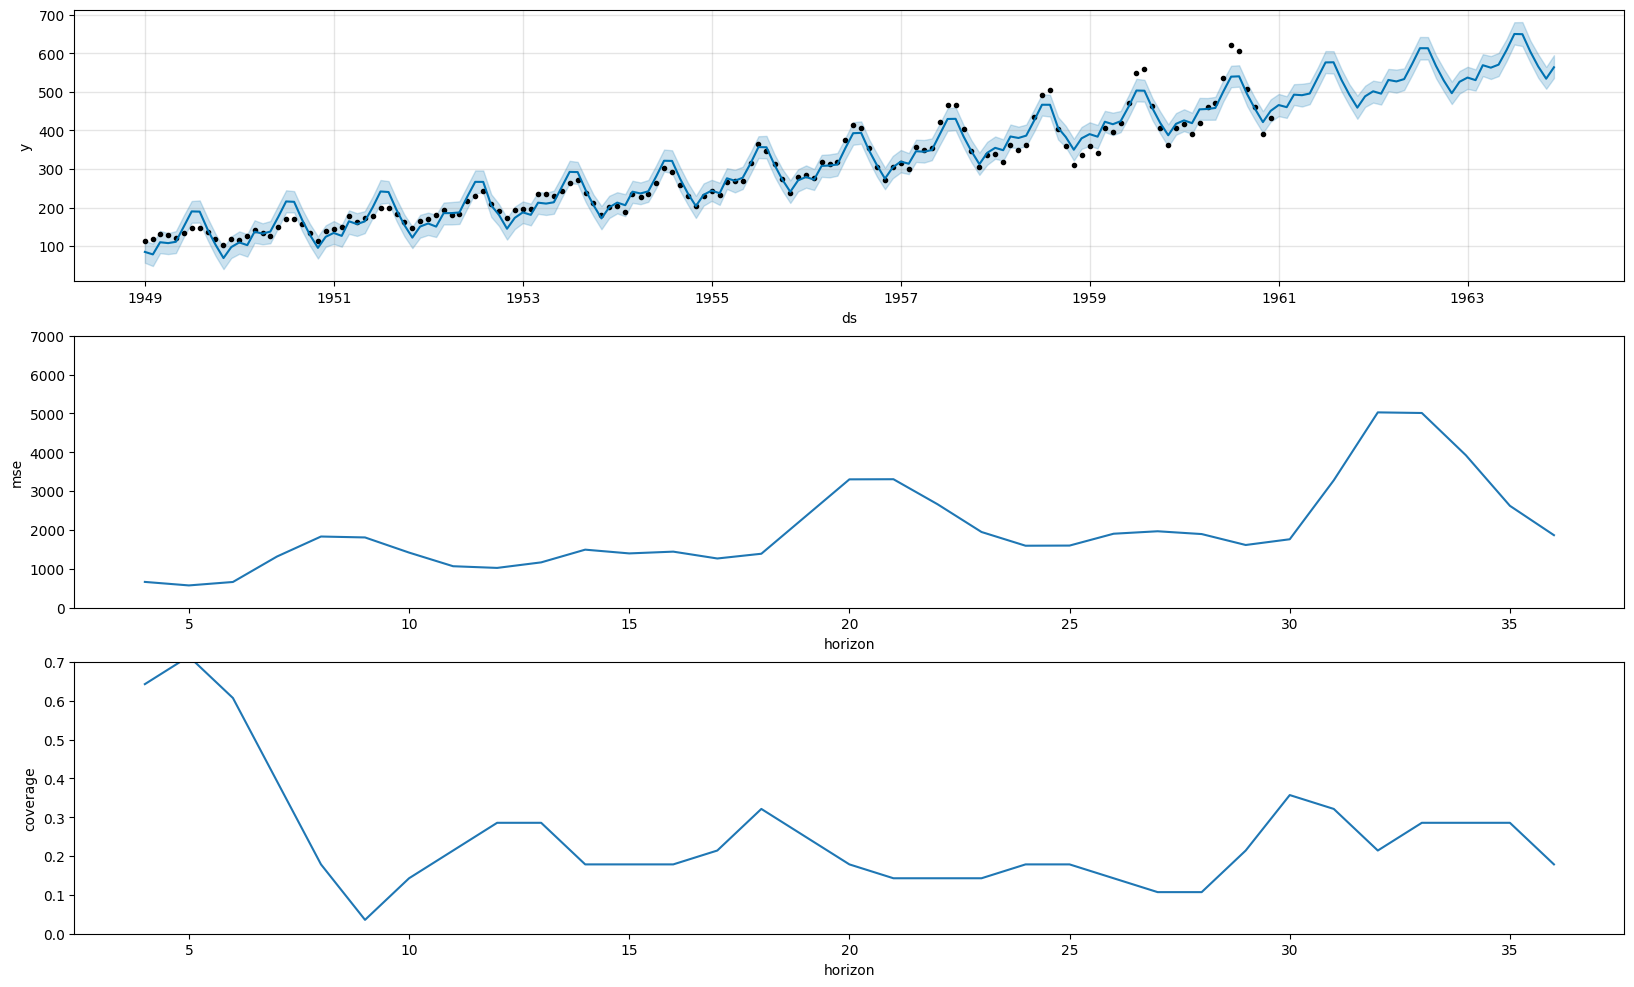

In [25]:
# 休日効果
model = Prophet()
model.add_country_holidays(country_name='US')
model.fit(df)
plot_train_result(model)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/bcbjcezm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/zdhyrhp6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36923', 'data', 'file=/tmp/tmpj05jfhvt/bcbjcezm.json', 'init=/tmp/tmpj05jfhvt/zdhyrhp6.json', 'output', 'file=/tmp/tmpj05jfhvt/prophet_model2r59rsaz/prophet_model-20240713121258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:12:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:12:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/htnlplcj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/d1w6ppd7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32162', 'data', 'file=/tmp/tmpj05jfhvt/htnlplcj.json', 'init=/tmp/tmpj05jfhvt/d1w6ppd7.json', 'output', 'file=/tmp/tmpj05jfhvt/prophet_modelov02n3_m/prophet_model-20240713121258.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:12:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:12:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/lptvz1mo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/qr2iu0xb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,33.00000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,20.00000,2091.419265,44.378625,37.731705,0.098061,0.092595,0.099249,0.229437
std,9.66954,1096.579862,11.214635,10.085581,0.016893,0.021195,0.019643,0.120463
min,4.00000,657.857313,25.648729,18.283956,0.055373,0.037894,0.053008,0.107143
25%,12.00000,1419.464224,37.675778,32.947774,0.090122,0.085608,0.090894,0.142857
50%,20.00000,1881.442860,43.375602,37.439020,0.101933,0.098364,0.100533,0.178571
75%,28.00000,2457.274138,49.570900,41.222763,0.110208,0.102948,0.108164,0.285714
max,36.00000,5114.332080,71.514559,60.995505,0.125381,0.121917,0.137637,0.571429


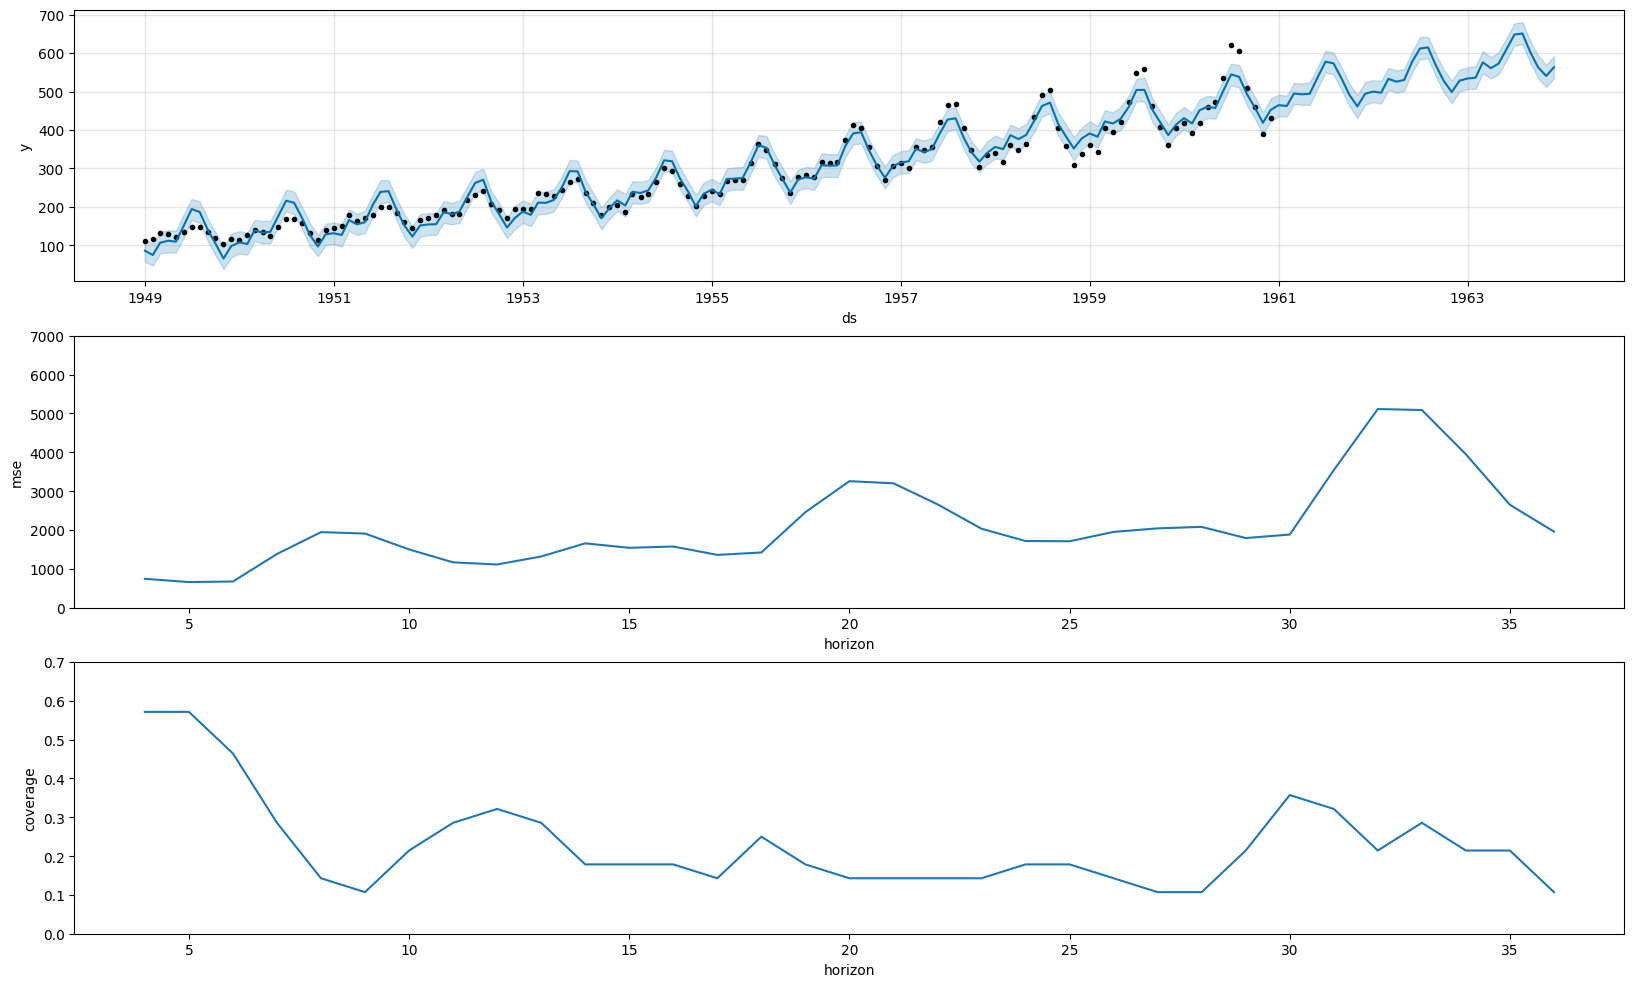

In [26]:
# weekly_seasonalityの設定
model = Prophet(weekly_seasonality=True)
model.fit(df)
plot_train_result(model)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/u8wlag0w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/xum1qaos.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2948', 'data', 'file=/tmp/tmpj05jfhvt/u8wlag0w.json', 'init=/tmp/tmpj05jfhvt/xum1qaos.json', 'output', 'file=/tmp/tmpj05jfhvt/prophet_model9njlxw9f/prophet_model-20240713121301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:13:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:13:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/0e1pgx0u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/4s7eycv1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29307', 'data', 'file=/tmp/tmpj05jfhvt/0e1pgx0u.json', 'init=/tmp/tmpj05jfhvt/4s7eycv1.json', 'output', 'file=/tmp/tmpj05jfhvt/prophet_modelnps5iqct/prophet_model-20240713121301.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:13:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:13:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/bq_chhj7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj05jfhvt/c7gkg34a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,33.00000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,20.00000,2012.652660,43.351332,36.802257,0.095340,0.090682,0.096810,0.242424
std,9.66954,1133.903255,11.725218,10.467544,0.017343,0.021451,0.020359,0.136802
min,4.00000,568.792889,23.849379,16.782401,0.050896,0.031200,0.048844,0.035714
25%,12.00000,1394.587389,37.344175,31.384996,0.086102,0.087801,0.088489,0.142857
50%,20.00000,1777.585776,42.161425,35.147965,0.098277,0.094868,0.095958,0.178571
75%,28.00000,2379.905290,48.784273,40.700015,0.107117,0.102648,0.105343,0.285714
max,36.00000,5125.930859,71.595606,61.371390,0.125590,0.123457,0.137866,0.642857


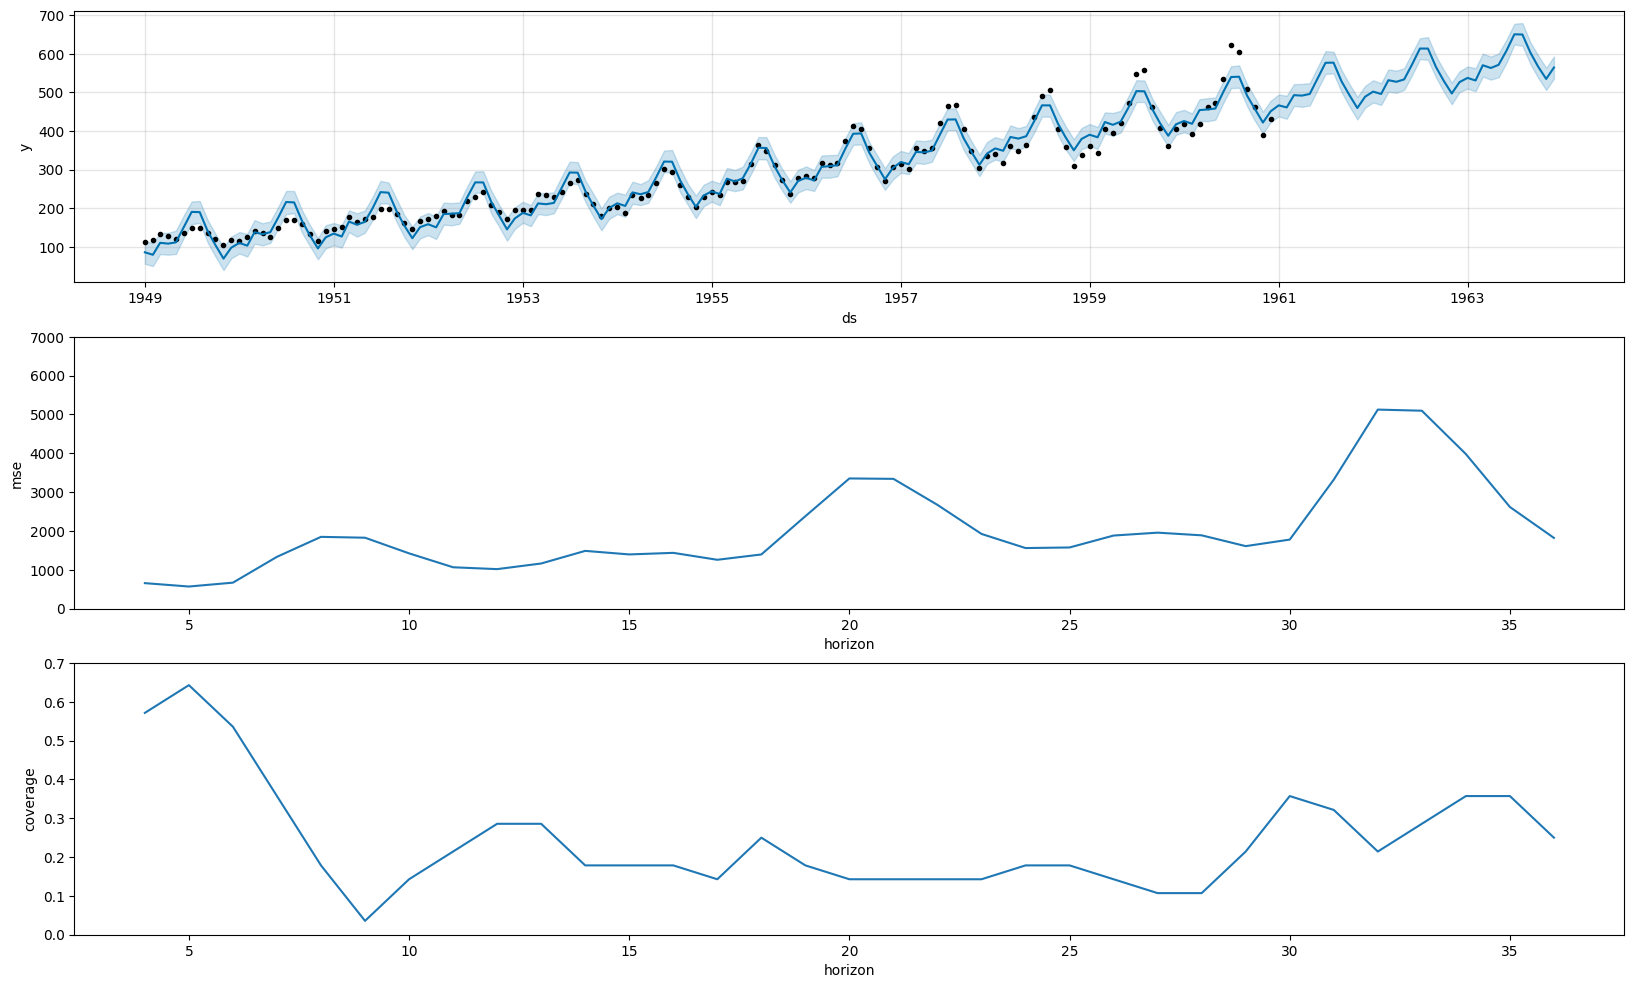

In [27]:
#n_chagepointsの設定
model = Prophet(n_changepoints=30)
model.fit(df)
plot_train_result(model)